<b><h1>EMPLOYEE BURNOUT RATE</h1></b>
<h3>By: Mohammed Saif Shaikh</h3>

<img src="https://www.wishup.co/blog/blog/content/images/2023/07/agency-young-adult-profession-stressed-black.jpg" alt="Italian Trulli">

This is a project on Employees likeliness of being on a verge of a burnout given a bunch of respective values.

Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. 
How are employees' Burn Rate affected based on various conditions provided? 

Globally, World Mental Health Day is celebrated on October 10 each year. 
The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. 
According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. 
These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

<b>Employee ID:</b> The unique ID allocated for each employee (example: fffe390032003000)<br>
<b>Date of Joining:</b> The date-time when the employee has joined the organization (example: 2008-12-30)<br>
<b>Gender:</b> The gender of the employee (Male/Female)<br>
<b>Company Type:</b> The type of company where the employee is working (Service/Product)<br>
<b>WFH Setup Available:</b> Is the work from home facility available for the employee (Yes/No)<br>
<b>Designation:</b> The designation of the employee of work in the organization.
        In the range of [0.0, 5.0] bigger is higher designation.<br>
<b>Resource Allocation:</b> The amount of resource allocated to the employee to work, ie. number of working hours.
        In the range of [1.0, 10.0] (higher means more resource) <br>
<b>Mental Fatigue Score:</b> The level of fatigue mentally the employee is facing.
        In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.<br>
<b>Burn Rate:</b> The value we need to predict for each employee telling the rate of Bur out while working.
        In the range of [0.0, 1.0] where the higher the value is more is the burn out.

<h3><b>IMPORTING LIBRARIES</b></h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3><b>LOADING DATASET</b></h3>

In [3]:
df=pd.read_csv(r"C:\Users\Mohammed Saif\Downloads\archive(16)\train.csv")

In [4]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,22750.0,2.178725,1.135145,0.0,1.00,2.00,3.00,5.0
Resource Allocation,21369.0,4.481398,2.047211,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,20633.0,5.728188,1.920839,0.0,4.60,5.90,7.10,10.0
Burn Rate,21626.0,0.452005,0.198226,0.0,0.31,0.45,0.59,1.0


In [7]:
df.shape

(22750, 9)

<h3><b>Exploratory Data Analysis (EDA)</b></h3>

In [8]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [9]:
null_percentage = df.isnull().sum() / len(df) * 100
null_percentage=null_percentage.sort_values(ascending=False)
print(null_percentage)

Mental Fatigue Score    9.305495
Resource Allocation     6.070330
Burn Rate               4.940659
Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
dtype: float64


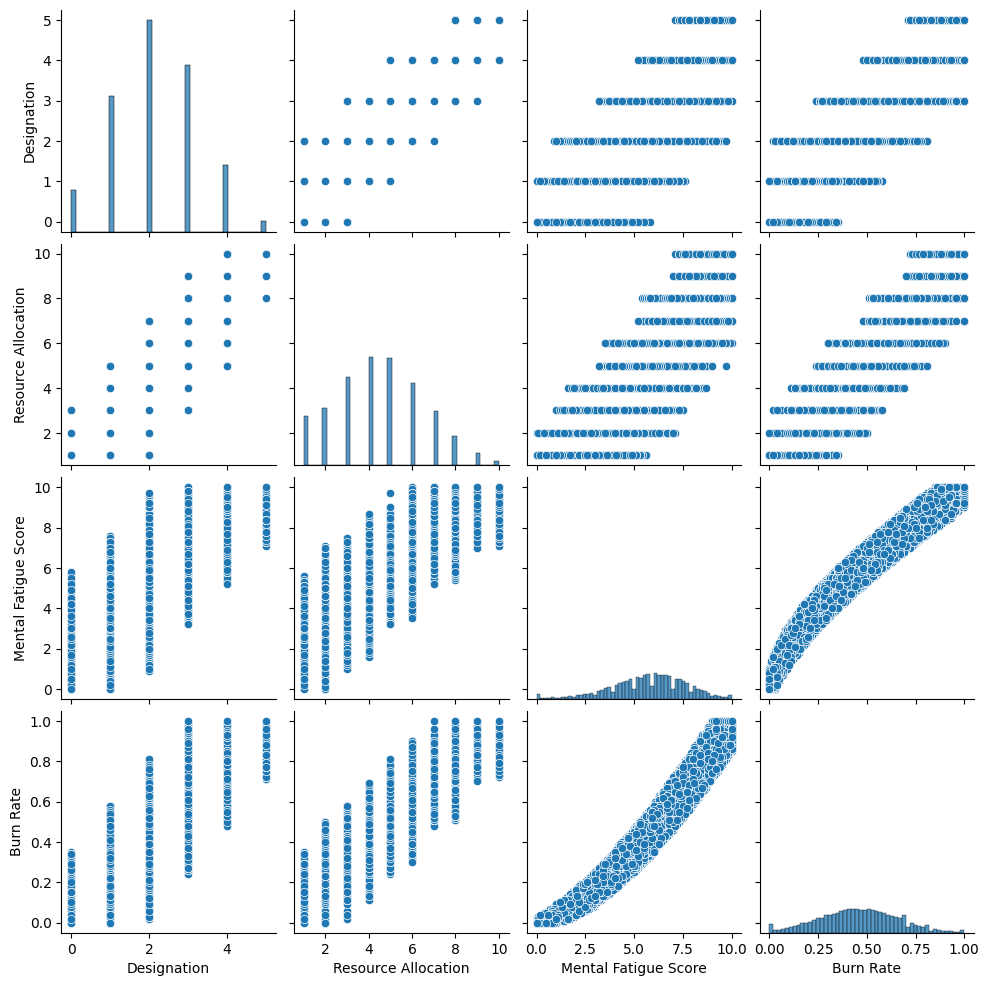

In [10]:
sns.pairplot(df)

<Axes: xlabel='Designation', ylabel='Mental Fatigue Score'>

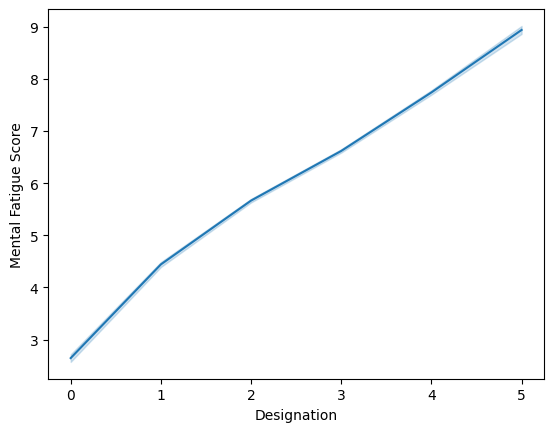

In [11]:
sns.lineplot(x='Designation',y='Mental Fatigue Score',data=df)

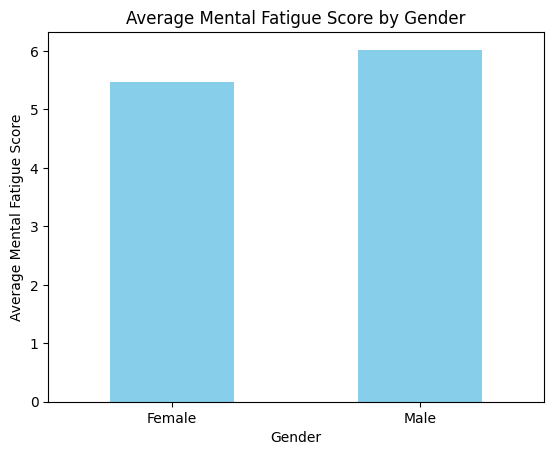

In [12]:
avg_fatigue_gender = df.groupby('Gender')['Mental Fatigue Score'].mean()
avg_fatigue_gender.plot(kind='bar', color='skyblue')
plt.title('Average Mental Fatigue Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Mental Fatigue Score')
plt.xticks(rotation=0)
plt.show()

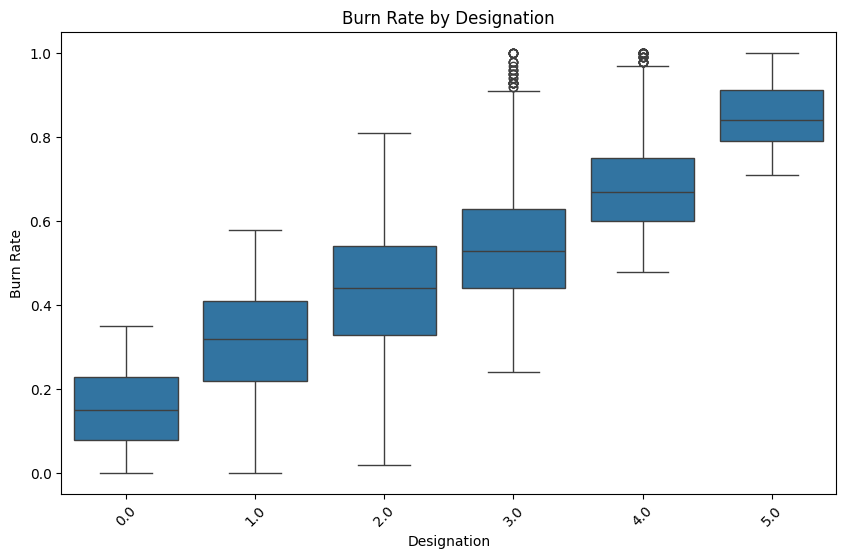

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Burn Rate', data=df)
plt.title('Burn Rate by Designation')
plt.xticks(rotation=45)
plt.show()

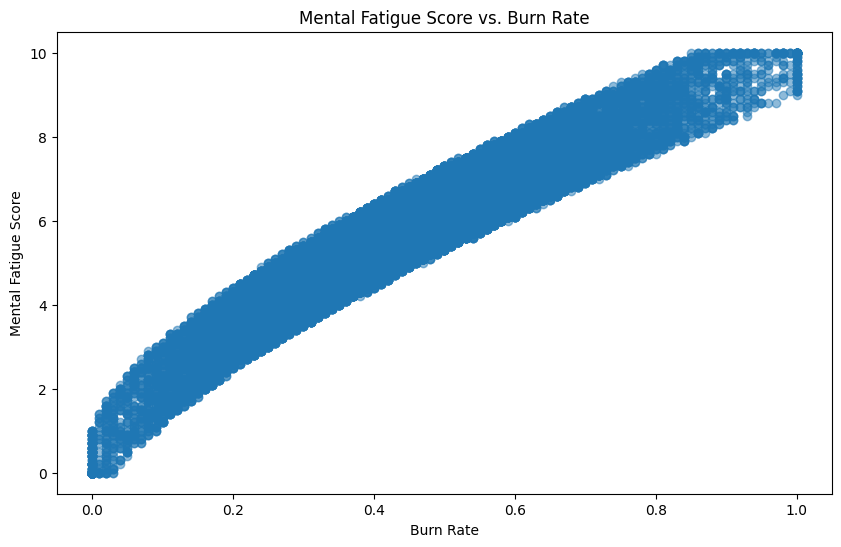

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Burn Rate'], df['Mental Fatigue Score'], alpha=0.5)
plt.title('Mental Fatigue Score vs. Burn Rate')
plt.xlabel('Burn Rate')
plt.ylabel('Mental Fatigue Score')
plt.show()

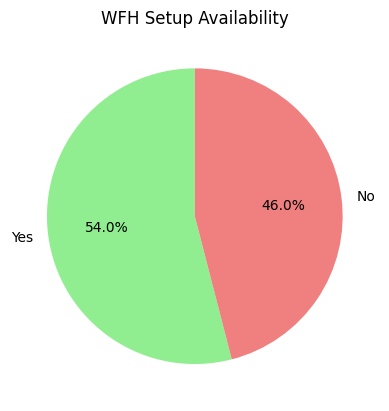

In [15]:
wfh_counts = df['WFH Setup Available'].value_counts()
wfh_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('WFH Setup Availability')
plt.ylabel('')
plt.show()

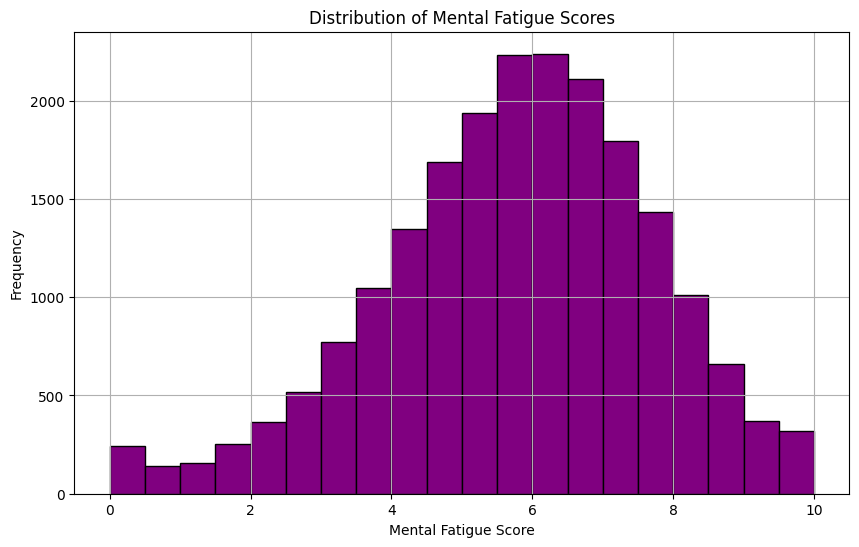

In [16]:
plt.figure(figsize=(10, 6))
df['Mental Fatigue Score'].hist(bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Mental Fatigue Scores')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frequency')
plt.show()

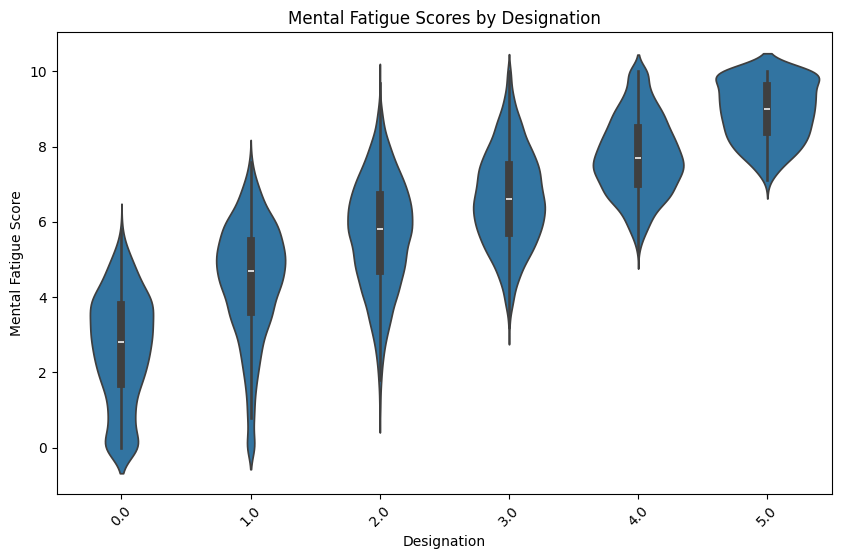

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Designation', y='Mental Fatigue Score', data=df)
plt.title('Mental Fatigue Scores by Designation')
plt.xticks(rotation=45)
plt.show()

In [18]:
unique_genders = df['Gender'].unique()
value_gender_counts = df['Gender'].value_counts()

In [19]:
unique_genders

array(['Female', 'Male'], dtype=object)

In [20]:
print(value_gender_counts/len(df)*100)

Gender
Female    52.342857
Male      47.657143
Name: count, dtype: float64


In [21]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

<Axes: >

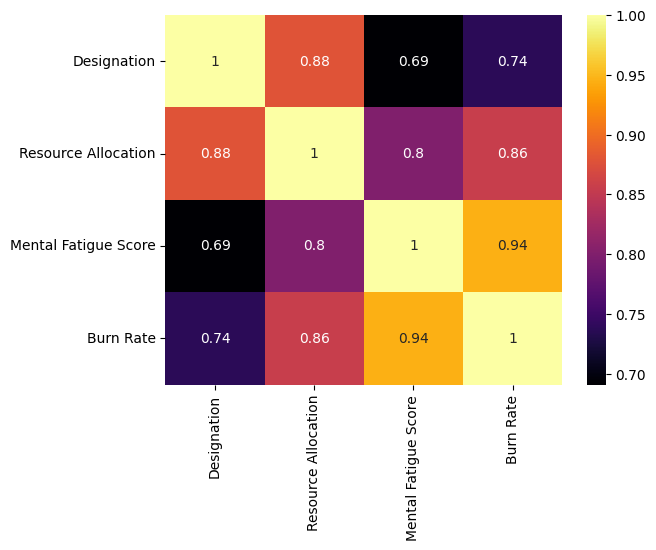

In [22]:
a=df[['Designation', 'Resource Allocation','Mental Fatigue Score', 'Burn Rate']]
sns.heatmap(a.corr(),annot=True,cmap='inferno')

In [23]:
#df['Company Type'].unique()
df['Company Type'].value_counts()

Company Type
Service    14833
Product     7917
Name: count, dtype: int64

In [24]:
df['WFH Setup Available'].value_counts()

WFH Setup Available
Yes    12290
No     10460
Name: count, dtype: int64

In [25]:
df['Gender'].value_counts()

Gender
Female    11908
Male      10842
Name: count, dtype: int64

In [26]:
df['Designation'].value_counts()

Designation
2.0    7588
3.0    5985
1.0    4881
4.0    2391
0.0    1507
5.0     398
Name: count, dtype: int64

<h3><b>DATA PREPROCESSING</b></h3>

In [27]:
current_date = datetime.now()
current_date

datetime.datetime(2024, 10, 24, 21, 14, 59, 993171)

In [28]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [29]:
#Converting the Dates to days.
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Days Working'] = (current_date - df['Date of Joining']).dt.days
df.drop(columns=['Date of Joining'],inplace=True)
df

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days Working
0,fffe32003000360033003200,Female,Service,No,2.0,3.0,3.8,0.16,5868
1,fffe3700360033003500,Male,Service,Yes,1.0,2.0,5.0,0.36,5807
2,fffe31003300320037003900,Female,Product,Yes,2.0,NaN,5.8,0.49,6072
3,fffe32003400380032003900,Male,Service,Yes,1.0,1.0,2.6,0.20,5834
4,fffe31003900340031003600,Female,Service,No,3.0,7.0,6.9,0.52,5936
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,Female,Service,No,1.0,3.0,NaN,0.41,5777
22746,fffe33003000350031003800,Female,Product,Yes,3.0,6.0,6.7,0.59,6123
22747,fffe390032003000,Male,Service,Yes,3.0,7.0,NaN,0.72,5832
22748,fffe33003300320036003900,Female,Service,No,2.0,5.0,5.9,0.52,6132


In [30]:
# Encoding categorical variables (Gender, Company Type, WFH Setup Available) using LabelEncoder
label_encoders = {}
for col in ['Gender', 'Company Type', 'WFH Setup Available']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [31]:
df 
#Gender - 1 is Male, 0 is Female
#Company Type - 1 is Service, 0 is Prodect
#WFH Setup Available - 1 is Yes, 0 is No

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days Working
0,fffe32003000360033003200,0,1,0,2.0,3.0,3.8,0.16,5868
1,fffe3700360033003500,1,1,1,1.0,2.0,5.0,0.36,5807
2,fffe31003300320037003900,0,0,1,2.0,NaN,5.8,0.49,6072
3,fffe32003400380032003900,1,1,1,1.0,1.0,2.6,0.20,5834
4,fffe31003900340031003600,0,1,0,3.0,7.0,6.9,0.52,5936
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,0,1,0,1.0,3.0,NaN,0.41,5777
22746,fffe33003000350031003800,0,0,1,3.0,6.0,6.7,0.59,6123
22747,fffe390032003000,1,1,1,3.0,7.0,NaN,0.72,5832
22748,fffe33003300320036003900,0,1,0,2.0,5.0,5.9,0.52,6132


In [32]:
# Handling missing values using SimpleImputer (mean for numeric columns)
imputer = SimpleImputer(strategy='mean')
df[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']] = imputer.fit_transform(
    df[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']])

In [33]:
df

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days Working
0,fffe32003000360033003200,0,1,0,2.0,3.000000,3.800000,0.16,5868
1,fffe3700360033003500,1,1,1,1.0,2.000000,5.000000,0.36,5807
2,fffe31003300320037003900,0,0,1,2.0,4.481398,5.800000,0.49,6072
3,fffe32003400380032003900,1,1,1,1.0,1.000000,2.600000,0.20,5834
4,fffe31003900340031003600,0,1,0,3.0,7.000000,6.900000,0.52,5936
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,0,1,0,1.0,3.000000,5.728188,0.41,5777
22746,fffe33003000350031003800,0,0,1,3.0,6.000000,6.700000,0.59,6123
22747,fffe390032003000,1,1,1,3.0,7.000000,5.728188,0.72,5832
22748,fffe33003300320036003900,0,1,0,2.0,5.000000,5.900000,0.52,6132


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Gender                22750 non-null  int32  
 2   Company Type          22750 non-null  int32  
 3   WFH Setup Available   22750 non-null  int32  
 4   Designation           22750 non-null  float64
 5   Resource Allocation   22750 non-null  float64
 6   Mental Fatigue Score  22750 non-null  float64
 7   Burn Rate             22750 non-null  float64
 8   Days Working          22750 non-null  int64  
dtypes: float64(4), int32(3), int64(1), object(1)
memory usage: 1.3+ MB


In [35]:
# Dropping the 'Employee ID' column because it is not needed
df.drop(columns=['Employee ID'], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                22750 non-null  int32  
 1   Company Type          22750 non-null  int32  
 2   WFH Setup Available   22750 non-null  int32  
 3   Designation           22750 non-null  float64
 4   Resource Allocation   22750 non-null  float64
 5   Mental Fatigue Score  22750 non-null  float64
 6   Burn Rate             22750 non-null  float64
 7   Days Working          22750 non-null  int64  
dtypes: float64(4), int32(3), int64(1)
memory usage: 1.1 MB


In [37]:
df.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
Days Working            0
dtype: int64

<h3><b>BUILDING PIPELINE</b></h3>

In [38]:
# Define features (X) and target (y)
X = df.drop(columns=['Burn Rate'])
y = df['Burn Rate']

In [39]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Checking the processed data
X_train.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Days Working
17557,0,1,1,3.0,5.0,8.200000,5804
6020,1,1,1,2.0,4.0,5.728188,6033
1739,1,1,1,2.0,5.0,6.900000,5917
14712,0,0,1,3.0,5.0,5.728188,5916
15387,0,1,0,2.0,4.0,6.600000,5982


In [41]:
y_train.head()

17557    0.452005
6020     0.490000
1739     0.620000
14712    0.452005
15387    0.440000
Name: Burn Rate, dtype: float64

In [42]:
X_test.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Days Working
11203,0,1,0,2.0,3.0,4.100000,6114
14049,0,0,1,3.0,6.0,5.728188,5911
13815,0,1,0,1.0,4.0,4.900000,5882
6603,1,1,0,1.0,3.0,5.000000,5949
4202,1,0,1,3.0,6.0,7.500000,5910


<b><h3>MODEL TRAINING</h3></b>

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Initialize the Random Forest Regressor (i.e Training the Model)
rf_reg = RandomForestRegressor(n_estimators=100,random_state=42)

In [45]:
# Train the model on the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Make predictions on the test set
y_pred = rf_reg.predict(X_test)

<b><h3>MODEL EVALUATION</h3></b>

In [47]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred) #Lower the better
r2 = r2_score(y_test, y_pred) #Higher the Better (Range: 0 to 1)
print(f'MSE Score:{mse}')
print(f'R2 Score:{r2}')

MSE Score:0.005752257316675168
R2 Score:0.8401909398612063


<b><h3>FINDINGS</h3></b>

<u><b>Model Interpretation and Insights</b></u><br>
After analyzing the model's predictions, several patterns emerge that reveal key insights into factors influencing employee burnout rates. 
For instance, employees with high scores in mental fatigue or lacking adequate resources show a marked increase in predicted burnout rates.
Such insights can help organizations identify employees at risk of burnout earlier, allowing them to implement preventative measures.

Some specific observations include:
- **Mental Fatigue**: Higher mental fatigue scores are associated with a notable increase in burnout likelihood.
- **Resource Allocation**: Employees with insufficient resources tend to show higher burnout rates.

These insights offer a data-driven approach to understanding burnout and improving workplace wellness by targeting support where it's most needed.


<b><u>Real-World Applications of the Model</b></u><br>
This model offers practical applications for HR departments and organizational leaders aiming to improve employee well-being. 
By utilizing predictive burnout scores, organizations can implement targeted interventions, such as:
- **Personalized Resource Allocation**: Ensuring that employees receive adequate resources based on their workload and project demands.
- **Mental Health Support**: Providing mental health resources, especially for employees with high mental fatigue indicators.
- **Flexible Scheduling**: Adjusting schedules or work-from-home options to help mitigate burnout risk.

These applications demonstrate the potential for data-driven models to positively impact workplace dynamics, fostering a healthier work environment.
